In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from isodate import parse_duration, ISO8601Error

In [8]:
recipes_df = pd.read_csv("../Data/Food_com/recipes.csv")

In [9]:
recipes_df.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [10]:
recipes_df.isnull().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
RecipeYield                   348071
R

In [11]:
recipes_df = recipes_df.drop(columns='RecipeYield')
# Drop rows with NaN values in place
recipes_df.dropna(inplace=True)

recipes_df.isnull().sum()

RecipeId                      0
Name                          0
AuthorId                      0
AuthorName                    0
CookTime                      0
PrepTime                      0
TotalTime                     0
DatePublished                 0
Description                   0
Images                        0
RecipeCategory                0
Keywords                      0
RecipeIngredientQuantities    0
RecipeIngredientParts         0
AggregatedRating              0
ReviewCount                   0
Calories                      0
FatContent                    0
SaturatedFatContent           0
CholesterolContent            0
SodiumContent                 0
CarbohydrateContent           0
FiberContent                  0
SugarContent                  0
ProteinContent                0
RecipeServings                0
RecipeInstructions            0
dtype: int64

In [12]:
# Convert time values to numeric
# Function to convert duration string to seconds
def convert_to_seconds(duration_str):
    try:
        if pd.notna(duration_str) and duration_str.strip() != '':
            duration = parse_duration(duration_str)
            return duration.total_seconds()
        else:
            return None  # or any other appropriate value for empty strings
    except ISO8601Error:
        return None  # or any other appropriate value for unexpected formats



time_collumns = ['CookTime', 'PrepTime', 'TotalTime']
for col in time_collumns:
    recipes_df[col] = recipes_df[col].apply(convert_to_seconds)

recipes_df.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,86400.0,2700.0,89100.0,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,1500.0,14400.0,15900.0,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,300.0,1800.0,2100.0,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,1200.0,86400.0,87600.0,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,1800.0,1200.0,3000.0,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,"c(""Mix everything together and bring to a boil..."


In [13]:
recipes_df.dtypes

RecipeId                        int64
Name                           object
AuthorId                        int64
AuthorName                     object
CookTime                      float64
PrepTime                      float64
TotalTime                     float64
DatePublished                  object
Description                    object
Images                         object
RecipeCategory                 object
Keywords                       object
RecipeIngredientQuantities     object
RecipeIngredientParts          object
AggregatedRating              float64
ReviewCount                   float64
Calories                      float64
FatContent                    float64
SaturatedFatContent           float64
CholesterolContent            float64
SodiumContent                 float64
CarbohydrateContent           float64
FiberContent                  float64
SugarContent                  float64
ProteinContent                float64
RecipeServings                float64
RecipeInstru

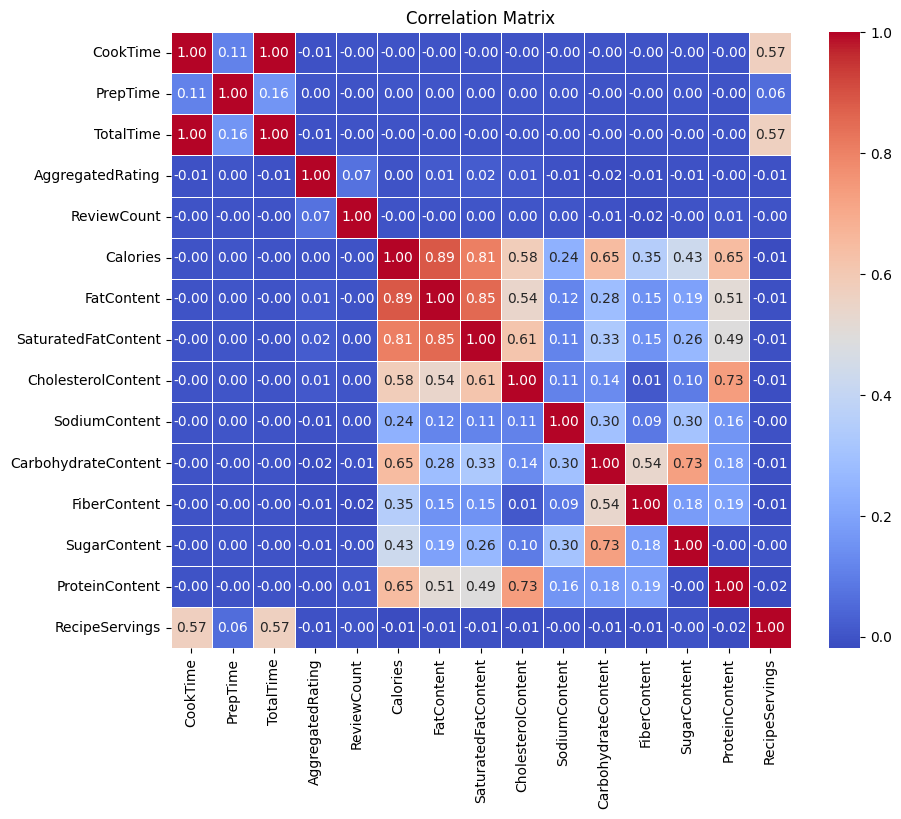

In [14]:
recipes_df_for_corr = recipes_df[
                                 ["CookTime",
                                  "PrepTime", 
                                  'TotalTime', 
                                  'AggregatedRating', 
                                  'ReviewCount', 
                                  'Calories', 
                                  'FatContent',
                                  'SaturatedFatContent', 
                                  'CholesterolContent', 
                                  'SodiumContent', 
                                  'CarbohydrateContent',
                                  'FiberContent',
                                  'SugarContent',
                                  'ProteinContent',
                                  'RecipeServings'
                                  ]
                                  ].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(recipes_df_for_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

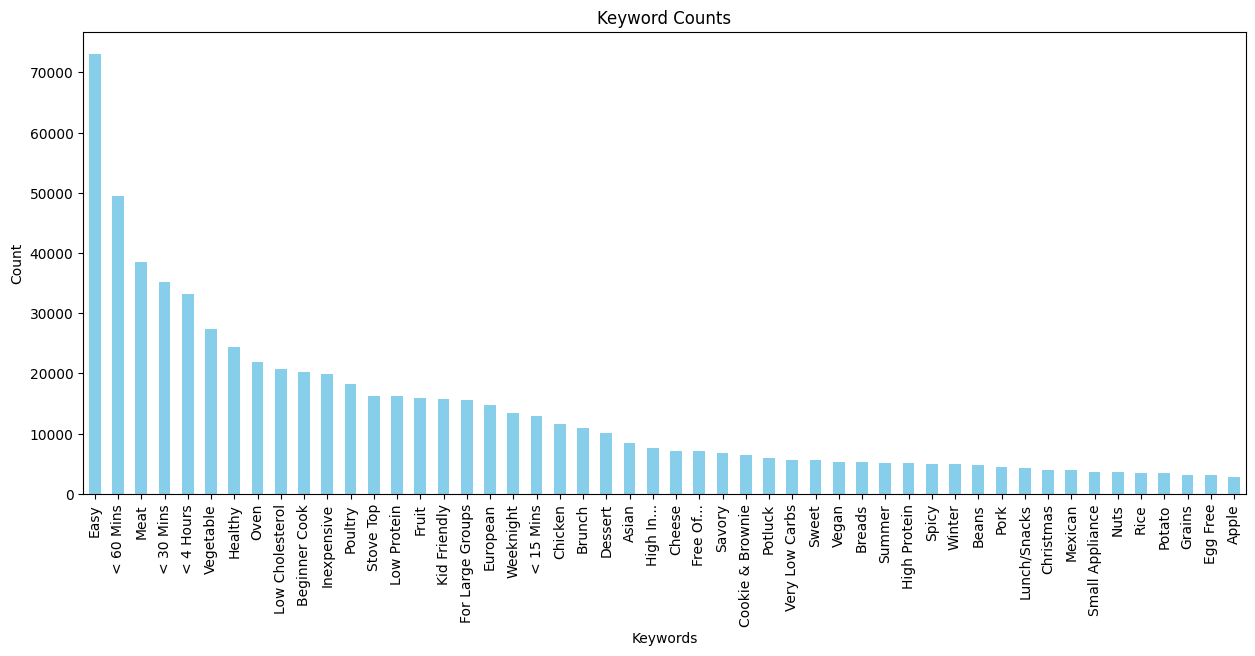

In [15]:
# Split combined keywords into separate rows
recipes_df['Keywords'] = recipes_df['Keywords'].str.extractall(r'"([^"]+)"').groupby(level=0).agg(','.join)
df_expanded = recipes_df['Keywords'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('Keyword')
sample_df = recipes_df.drop('Keywords', axis=1).join(df_expanded)

keyword_counts = sample_df['Keyword'].value_counts().nlargest(50)

# Plot the bar chart
plt.figure(figsize=(15, 6))
keyword_counts.plot(kind='bar', color='skyblue')
plt.title('Keyword Counts')
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.show()

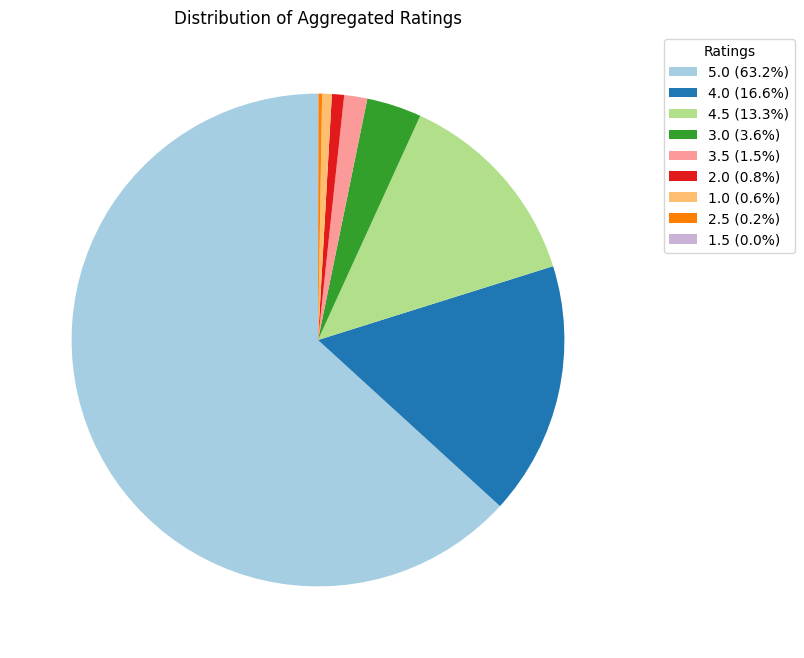

In [16]:
# Count the occurrences of each rating
rating_counts = recipes_df['AggregatedRating'].value_counts()

# Plot the pie chart without percentage labels
plt.figure(figsize=(8, 8))
wedges, texts, _ = plt.pie(rating_counts, labels=None, autopct='', startangle=90, colors=plt.cm.Paired.colors)

# Create percentage labels
percentage_labels = [f'{p:.1f}%' for p in rating_counts / rating_counts.sum() * 100]

# Create legend with ratings and percentage labels
legend_labels = [f'{rating} ({percentage})' for rating, percentage in zip(rating_counts.index, percentage_labels)]
plt.legend(wedges, legend_labels, title='Ratings', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Aggregated Ratings')
plt.show()

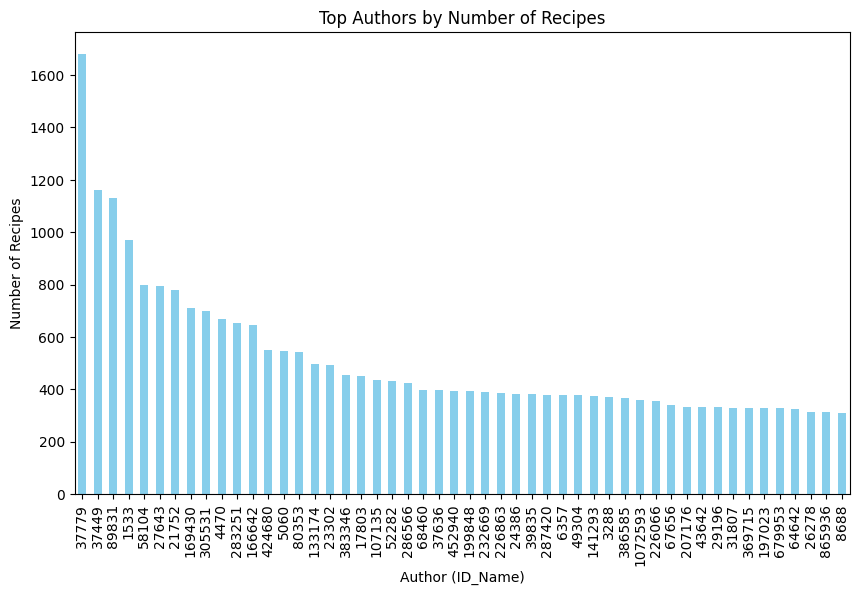

In [17]:
# Count the number of recipes per author
author_counts = recipes_df['AuthorId'].value_counts()

# Plot the top authors by the number of recipes
top_authors = author_counts.nlargest(50)  # Adjust the number as needed

plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar', color='skyblue')
plt.title('Top Authors by Number of Recipes')
plt.xlabel('Author (ID_Name)')
plt.ylabel('Number of Recipes')
plt.show()

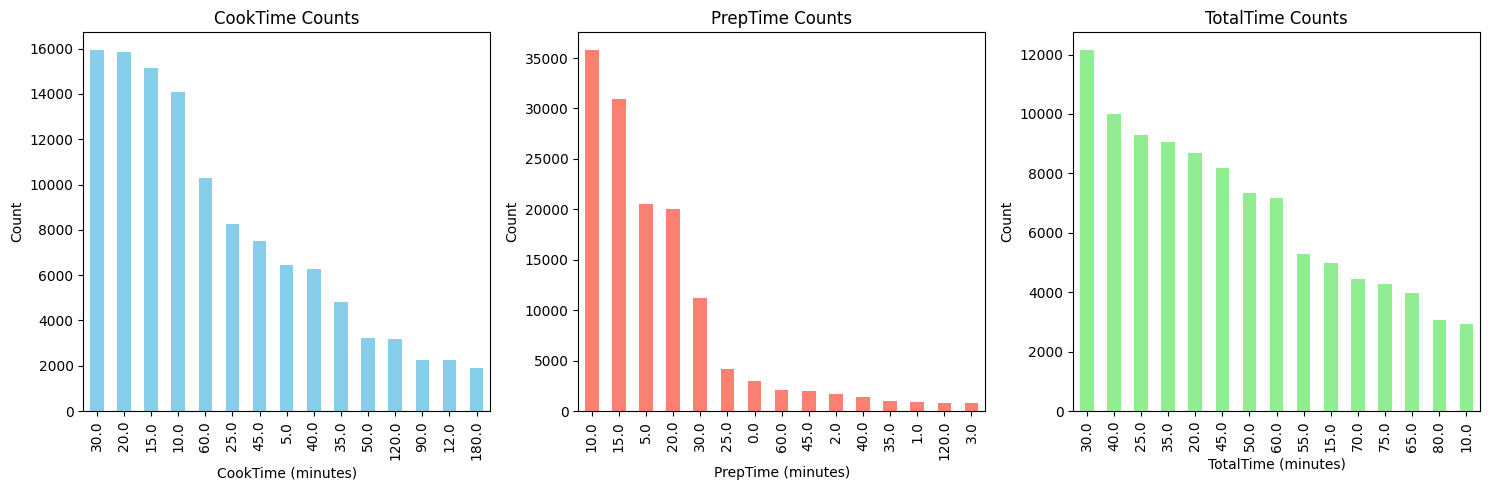

In [18]:
# Convert duration columns from seconds to minutes
recipes_df[['CookTime', 'PrepTime', 'TotalTime']] = recipes_df[['CookTime', 'PrepTime', 'TotalTime']].apply(lambda x: x / 60)

# Plot the count of unique values in each column
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for 'CookTime'
recipes_df['CookTime'].value_counts().nlargest(15).plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('CookTime Counts')
axes[0].set_xlabel('CookTime (minutes)')
axes[0].set_ylabel('Count')

# Plot for 'PrepTime'
recipes_df['PrepTime'].value_counts().nlargest(15).plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('PrepTime Counts')
axes[1].set_xlabel('PrepTime (minutes)')
axes[1].set_ylabel('Count')

# Plot for 'TotalTime'
recipes_df['TotalTime'].value_counts().nlargest(15).plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('TotalTime Counts')
axes[2].set_xlabel('TotalTime (minutes)')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()